In [114]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import (confusion_matrix,
                             precision_score,
                             recall_score,
                             f1_score,
                             classification_report,
                             precision_recall_curve,
                             roc_curve,
                             roc_auc_score)

from matplotlib import pyplot as plt


In [5]:
mnist = datasets.fetch_openml('mnist_784', version = 1)

In [6]:
type(mnist)

sklearn.utils.Bunch

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
mnist_data = mnist['data'].values

In [13]:
mnist_data.shape

(70000, 784)

In [14]:
28 * 28

784

In [17]:
mnist_data[12345].reshape(28, 28)

(28, 28)

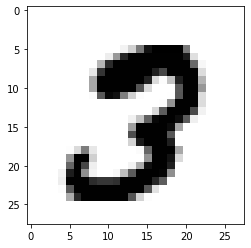

In [24]:
plt.imshow(mnist_data[12345].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest');

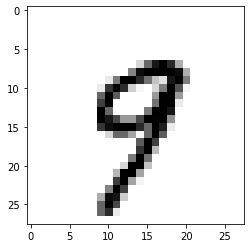

In [23]:
plt.imshow(mnist_data[57].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest');

In [25]:
mnist_data[57]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

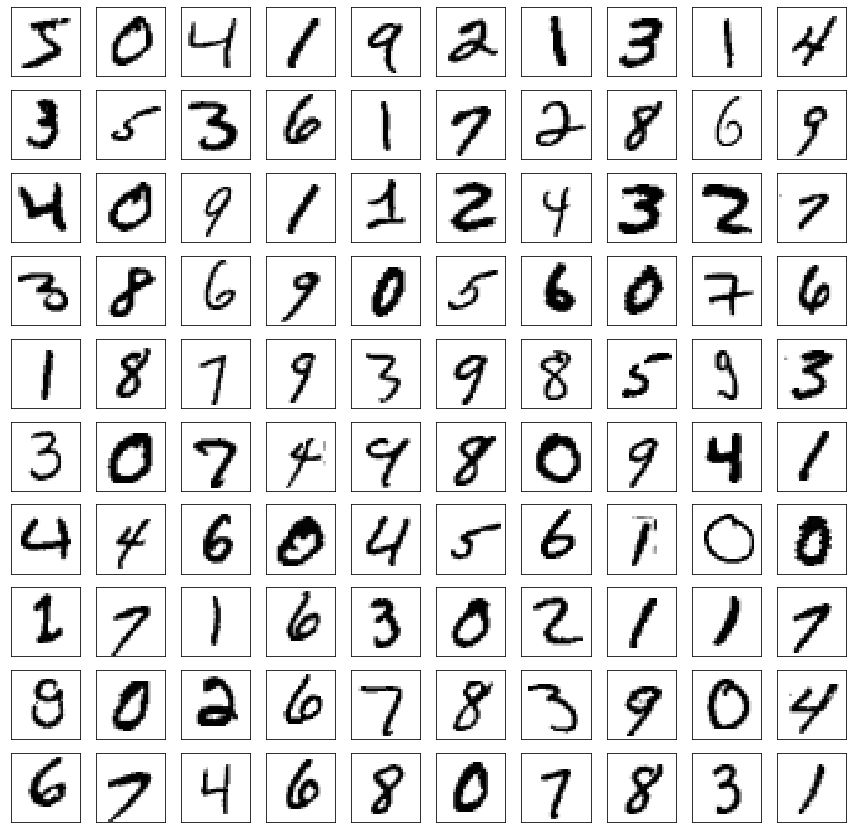

In [26]:
fig = plt.figure(figsize = (15, 15))

for i in range(100):
    fig.add_subplot(10, 10, i + 1, xticks = [], yticks = [])
    plt.imshow(mnist_data[i].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest');

In [28]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [29]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [30]:
type(mnist['target'])

pandas.core.series.Series

In [32]:
mnist_target = mnist['target'].values

In [35]:
mnist_target

['5', '0', '4', '1', '9', ..., '2', '3', '4', '5', '6']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [37]:
s = train_test_split(mnist_data, mnist_target)

In [38]:
len(s)

4

In [62]:
X_train, X_test, y_train, y_test = train_test_split(mnist_data, 
                                                    mnist_target,
                                                    test_size=0.2,
                                                    random_state=101)

In [63]:
X_train.shape

(56000, 784)

In [64]:
X_test.shape

(14000, 784)

In [65]:
y_train.shape

(56000,)

In [66]:
y_test.shape

(14000,)

In [67]:
y_train

['3', '5', '8', '8', '8', ..., '0', '8', '8', '8', '5']
Length: 56000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [68]:
y_train = y_train == '8'

In [69]:
y_train

array([False, False,  True, ...,  True,  True, False])

In [70]:
y_test = y_test == '8'

In [71]:
y_train.mean(), y_test.mean()

(0.09778571428571428, 0.09635714285714286)

In [72]:
y_train

array([False, False,  True, ...,  True,  True, False])

In [78]:
logreg = LogisticRegression(max_iter = 10000)

In [91]:
X_train = preprocessing.scale(X_train)

In [92]:
X_test = preprocessing.scale(X_test)

In [93]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

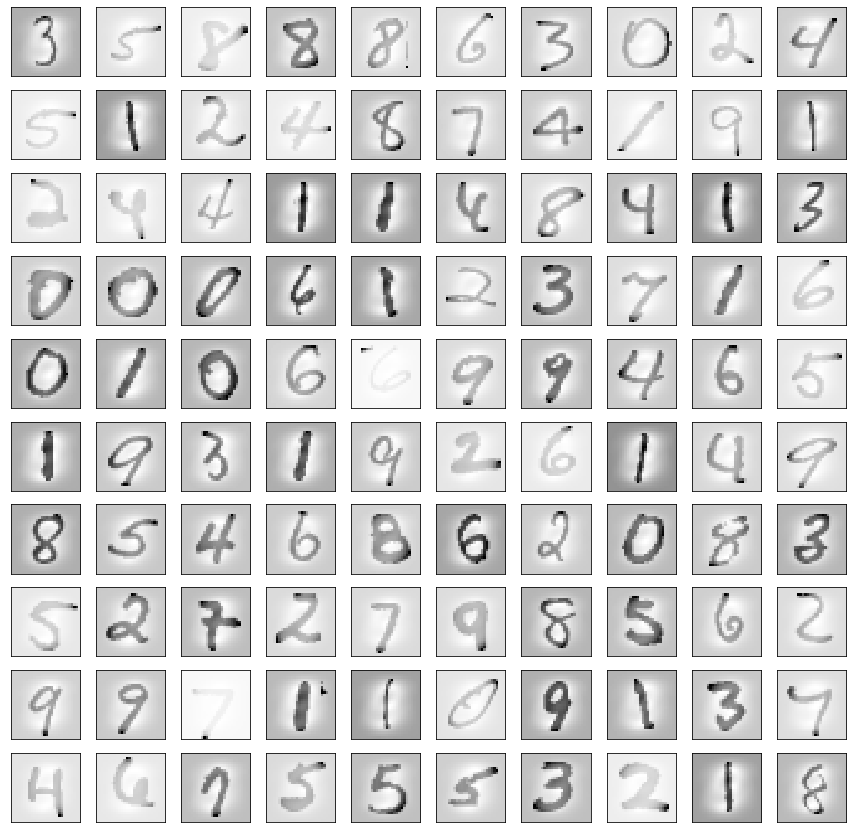

In [95]:
fig = plt.figure(figsize = (15, 15))

for i in range(100):
    fig.add_subplot(10, 10, i + 1, xticks = [], yticks = [])
    plt.imshow(X_train[i].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest');

In [98]:
preprocessing.scale

In [100]:
X_train.var()

0.9119897959183954

In [101]:
result = logreg.fit(X_train, y_train)

In [103]:
result

LogisticRegression(max_iter=10000)

In [104]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
y_train

array([False, False,  True, ...,  True,  True, False])

In [106]:
result.predict(X_train)

array([False, False, False, ...,  True,  True, False])

In [107]:
result.predict_proba(X_train)

array([[0.99350631, 0.00649369],
       [0.99897173, 0.00102827],
       [0.59854676, 0.40145324],
       ...,
       [0.07667905, 0.92332095],
       [0.00552079, 0.99447921],
       [0.9964962 , 0.0035038 ]])

In [111]:
prob = result.predict_proba(X_train)[:,1]

In [110]:
%rep 95

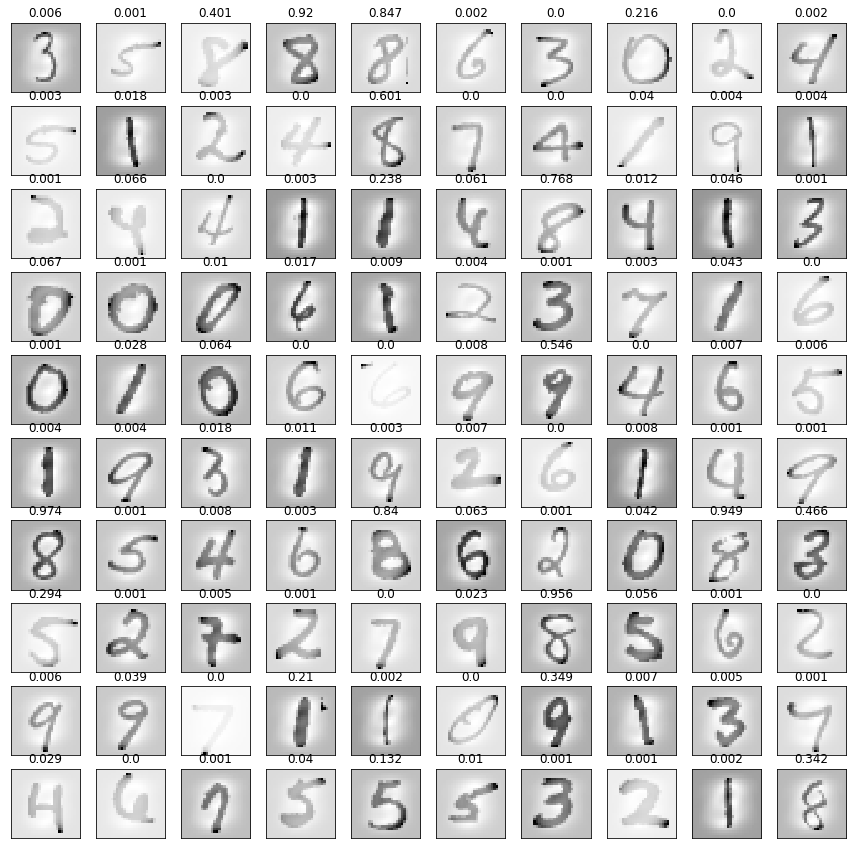

In [113]:
fig = plt.figure(figsize = (15, 15))

for i in range(100):
    fig.add_subplot(10, 10, i + 1, xticks = [], yticks = [])
    plt.imshow(X_train[i].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest');
    plt.title(prob[i].round(3))

In [115]:
logreg.predict(X_train)

array([False, False, False, ...,  True,  True, False])

In [118]:
logreg.predict_proba(X_train)[:,1] > 0.5

array([False, False, False, ...,  True,  True, False])

In [120]:
(logreg.predict(X_train) == (logreg.predict_proba(X_train)[:,1] > 0.5)).mean()

1.0

In [121]:
y_test

array([False, False, False, ..., False, False, False])

In [122]:
y_test_classification = logreg.predict(X_test)

In [123]:
confusion_matrix(y_test, y_test_classification)

array([[12483,   168],
       [  391,   958]])

In [125]:
y_test.sum()

1349

In [126]:
y_test_classification.sum()

1126

In [127]:
y_test_classification.shape

(14000,)

In [128]:
168 + 958

1126

In [129]:
 391 +958

1349

In [130]:
precision_score(y_test, y_test_classification)

0.8507992895204263

In [131]:
958 / (958 + 168)

0.8507992895204263

In [132]:
recall_score(y_test, y_test_classification)

0.7101556708673091

In [133]:
958 / (391 +  958)

0.7101556708673091

## harmonic mean

Reciprocal of the arithmetic mean of the reciprocals of the precision and recall scores.

In [134]:
f1_score(y_test, y_test_classification)

0.7741414141414142

In [135]:
precision = precision_score(y_test, y_test_classification)
recall = recall_score(y_test, y_test_classification)

In [138]:
1/((1/precision + 1/recall)/2)

0.7741414141414141

In [140]:
print(classification_report(y_test, y_test_classification))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     12651
        True       0.85      0.71      0.77      1349

    accuracy                           0.96     14000
   macro avg       0.91      0.85      0.88     14000
weighted avg       0.96      0.96      0.96     14000



In [143]:
p = logreg.predict_proba(X_test)[:,1]

In [144]:
import numpy as np

In [146]:
logodds = np.log(p) - np.log(1 - p)

In [148]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logodds)

In [151]:
(12651 * 0.99 + 1349 * 0.71)/(14000)

0.9630199999999999

In [152]:
(0.98 + 0.77)/2

0.875

In [153]:
confusion_matrix(y_test, y_test_classification)

array([[12483,   168],
       [  391,   958]])